In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
plt.rcParams['font.size']=16

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
train_data = pd.read_csv("data/citibike_tripdata_201306.csv", index_col="Unnamed: 0")
train_data

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude
0,695,40.742354,-73.989151,40.743174,-74.003664
1,693,40.742354,-73.989151,40.743174,-74.003664
2,2059,40.695128,-73.995951,40.695128,-73.995951
3,123,40.735243,-73.987586,40.691782,-73.973730
4,1521,40.705693,-74.016777,40.689269,-73.989129
...,...,...,...,...,...
5183,813,40.757148,-73.972078,40.728419,-73.987140
5184,912,40.702772,-73.993836,40.695977,-73.990149
5185,239,40.685144,-73.953809,40.680342,-73.955769
5186,590,40.735877,-73.982050,40.729554,-73.980572


/tmp/ipykernel_12113/1931551605.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = mpatches.Rectangle(xy=(x, y), width=width, height=height,


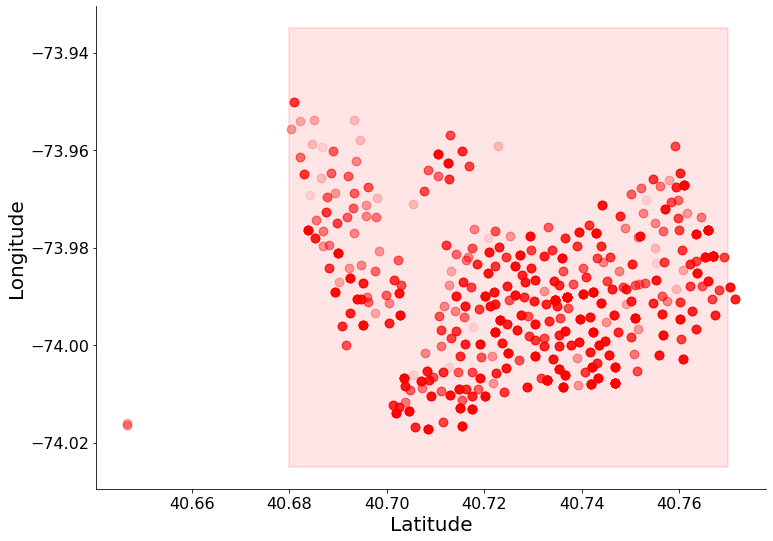

In [59]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(12, 12))
#start_locs = plt.scatter(train_data['start station latitude'], train_data["start station longitude"], alpha=0.1, c="blue", s=75, label='start positions')
end_loc = plt.scatter(train_data['end station latitude'], train_data["end station longitude"], alpha=0.1, c="red", s=75, label='start positions')
x, y, width, height = (40.68, -74.025, 0.09, 0.09)
rect = mpatches.Rectangle(xy=(x, y), width=width, height=height, 
                        fill=True,
                        color="red",
                       linewidth=2,
                       facecolor="red",
                       alpha=0.1)
plt.gca().add_patch(rect)
plt.gca().set_aspect('equal', adjustable='box')
sns.despine()
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20)
#plt.savefig("./figures/citibike_end.svg")
plt.show()

Text(0.5, 0, 'Duration (sec)')

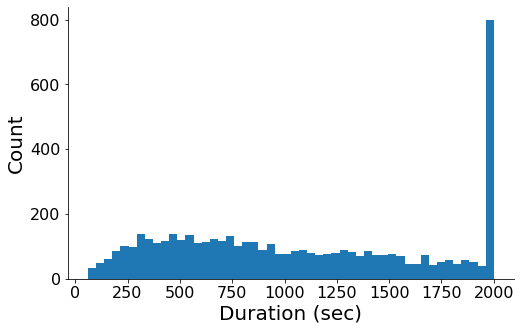

In [60]:
plt.figure(figsize=(8, 5))
durations = np.clip(train_data['tripduration'], 60, 2000)
plt.hist(durations, bins=50)
sns.despine()
plt.ylabel("Count", fontsize=20)
plt.xlabel("Duration (sec)", fontsize=20)
# plt.savefig("./figures/hist_citibike_durations.svg")

In [61]:
X = train_data.drop(['tripduration', ], axis=1)
y = train_data['tripduration']

### Applying local DP to citibike dataset

In [66]:
from datasets import load_citibike_data
X, y = load_citibike_data(private_features=True, private_targets=True, eps=10, mechanism='gauss', delta=1e-5)
print(X.shape, y.shape)

Adding Gaussian noise with scale=968.9610525210777
Adding Gaussian noise with scale=0.0436032473634485
Adding Gaussian noise with scale=0.0436032473634485
Adding Gaussian noise with scale=0.0436032473634485
Adding Gaussian noise with scale=0.0436032473634485
(5000, 4) (5000,)


/tmp/ipykernel_12113/2305869201.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = mpatches.Rectangle(xy=(x_loc, y_loc), width=width, height=height,


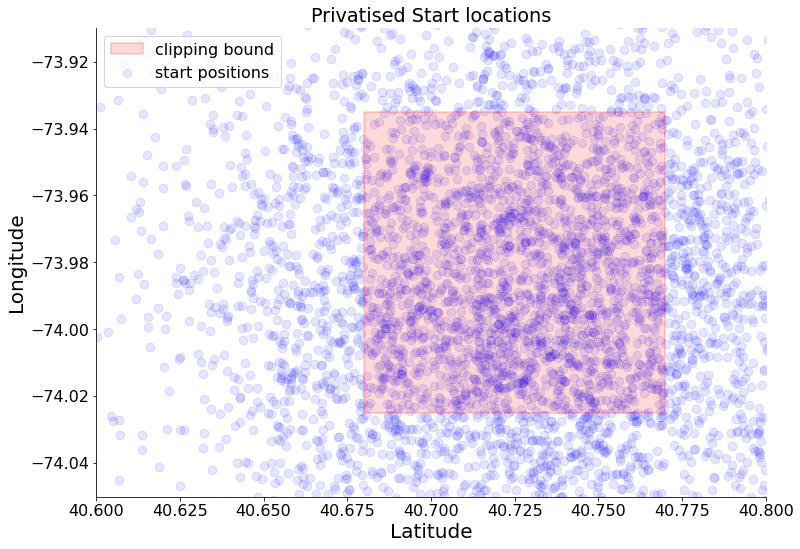

In [67]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(12, 12))
#start_locs = plt.scatter(train_data['start station latitude'], train_data["start station longitude"], alpha=0.1, c="blue", s=75, label='start positions')
end_loc = plt.scatter(X[:, 0], X[:, 1], alpha=0.1, c="blue", s=75, label='start positions')
x_loc, y_loc, width, height = (40.68, -74.025, 0.09, 0.09)
rect = mpatches.Rectangle(xy=(x_loc, y_loc), width=width, height=height, 
                        fill=True,
                        color="red",
                        linewidth=2,
                        facecolor="red",
                        alpha=0.15,
                        label='clipping bound')
plt.gca().add_patch(rect)
plt.gca().set_aspect('equal', adjustable='box')
sns.despine()
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20)
plt.ylim((-74.05, -73.91))
plt.xlim((40.6, 40.8))
plt.title("Privatised Start locations")
plt.legend()
#plt.savefig("./figures/citibike_start_private.svg")
plt.show()

/tmp/ipykernel_12113/2112736350.py:6: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = mpatches.Rectangle(xy=(x_loc, y_loc), width=width, height=height,


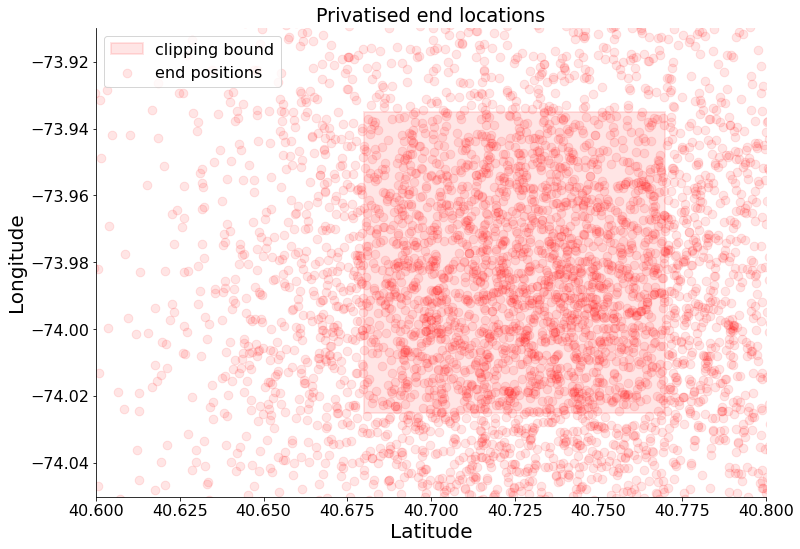

In [68]:
import matplotlib.patches as mpatches
fig = plt.figure(figsize=(12, 12))
#start_locs = plt.scatter(train_data['start station latitude'], train_data["start station longitude"], alpha=0.1, c="blue", s=75, label='start positions')
end_loc = plt.scatter(X[:, 2], X[:, 3], alpha=0.1, c="red", s=75, label='end positions')
x_loc, y_loc, width, height = (40.68, -74.025, 0.09, 0.09)
rect = mpatches.Rectangle(xy=(x_loc, y_loc), width=width, height=height, 
                        fill=True,
                        color="red",
                       linewidth=2,
                       facecolor="red",
                       alpha=0.1,
                       label='clipping bound')
plt.gca().add_patch(rect)
plt.gca().set_aspect('equal', adjustable='box')
sns.despine()
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20)
plt.ylim((-74.05, -73.91))
plt.xlim((40.60, 40.80))
plt.title("Privatised end locations")
plt.legend()
#plt.savefig("./figures/citibike_end_private.svg")
plt.show()

Text(0.5, 0, 'Duration (sec)')

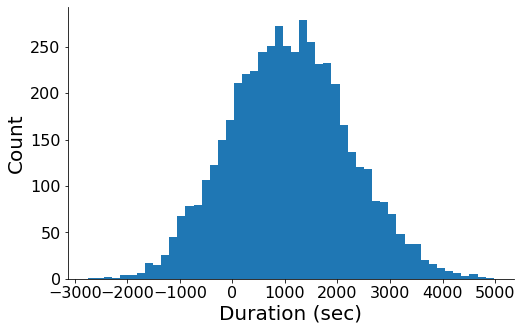

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(y, bins=50)
sns.despine()
plt.ylabel("Count", fontsize=20)
plt.xlabel("Duration (sec)", fontsize=20)
#plt.savefig("./figures/hist_citibike_durations_private.svg")